In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fraud_prediction.csv')

In [3]:
data.head()

,Unnamed: 0,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,2,1.0,181.0,181.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,3,1.0,181.0,181.0,0.0,21182.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,251,1.0,2806.0,2806.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,252,1.0,2806.0,2806.0,0.0,26202.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,680,1.0,20128.0,20128.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
#separamos en test y train

from sklearn.model_selection import train_test_split

features = data.drop('isFraud', axis = 1).values
target = data['isFraud'].values 

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42, stratify=target)



In [12]:
#creamos algoritmo regresion logistica 

from sklearn import linear_model

logistic_regression = linear_model.LogisticRegression()

logistic_regression.fit(x_train, y_train)

#evaluamos su precisión

logistic_regression.score(x_test, y_test)

0.6124786741408725

In [17]:
#si da baja precisión , vamos a modificar hiperparametros

#se modifica penalty, solver se puede sacar o poner si da error

logistic_regression = linear_model.LogisticRegression(penalty='l1', solver='liblinear')

#GridSearchCV para buscar el mejor parametro

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(x_train, y_train)

print("The most optimal inverse regularization strength is:", grid.best_params_)

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The most optimal inverse regularization strength is: {'C': 10}


c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
#se ejecuta con el mejor parametro C

logistic_regression = linear_model.LogisticRegression(C = 10, penalty = 'l1',solver='liblinear')

logistic_regression.fit(x_train, y_train)
logistic_regression.score(x_test, y_test)



0.996953448696076

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


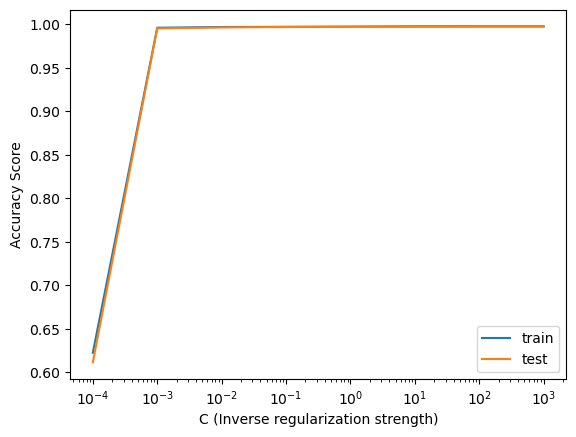

In [22]:
#grafico

train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluar los errores de clasificación de entrenamiento y pruebas para cada valor de C

for value in C_list:
 
 # se crea el algoritmo con cada valor de C
 logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1', solver='liblinear')
 logistic_regression.fit(x_train, y_train)
 
 # se evalua el error y asigna en una lista
 train_errors.append(logistic_regression.score(x_train, y_train) )
 test_errors.append(logistic_regression.score(x_test, y_test))
 
# resultados
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#se escala el modelo 

pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(C = 10, penalty = 'l1', solver='liblinear'))]

pipeline = Pipeline(pipeline_order)



logistic_regression_scaled = pipeline.fit(x_train, y_train)

#nivel de precision actual

logistic_regression_scaled.score(x_test, y_test)

0.99719717280039

In [24]:
# para averiguar de que manera cada variable contribuye en el modelo 


print(logistic_regression.coef_)

[[ 4.69791774e-05  2.43849182e-01 -4.50223475e-06  2.41897819e-05
  -3.56377193e-05 -1.70723185e-06 -1.00631017e-07 -1.20717532e+01
  -1.03043403e+01 -1.97079864e+01 -1.27635212e+01 -1.04463432e+01]]


In [25]:
print(logistic_regression.intercept_)


[4.25036243]
